In [1]:
%matplotlib notebook

In [2]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Store file path in a variable and read in csv

file = "CleanedYouTube.csv"

yt_df = pd.read_csv(file)

#Print head

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
0,0,WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,17.14.11,2017-11-13T17:13:01.000Z,748374
1,1,The Trump Presidency: Last Week Tonight with J...,1ZAPwfrtAFY,17.14.11,2017-11-13T07:30:00.000Z,2418783
2,2,"Racist Superman | Rudy Mancuso, King Bach & Le...",5qpjK5DgCt4,17.14.11,2017-11-12T19:05:24.000Z,3191434
3,3,Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,17.14.11,2017-11-13T11:00:04.000Z,343168
4,4,I Dare You: GOING BALD!?,d380meD0W0M,17.14.11,2017-11-12T18:01:41.000Z,2095731


In [4]:
#trending date vs. views

trending_df = yt_df[["Video Title", "Video ID", "Trending Date", "Total Views"]]

trending_df.head()

,Video Title,Video ID,Trending Date,Total Views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,2kyS6SvSYSE,17.14.11,748374
1,The Trump Presidency: Last Week Tonight with J...,1ZAPwfrtAFY,17.14.11,2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",5qpjK5DgCt4,17.14.11,3191434
3,Nickelback Lyrics: Real or Fake?,puqaWrEC7tY,17.14.11,343168
4,I Dare You: GOING BALD!?,d380meD0W0M,17.14.11,2095731


In [5]:
#Organize by Video Title using Video ID
videotitle_df = trending_df.sort_values(["Video ID", "Trending Date", "Total Views"], ascending = (False, True, True))

videotitle_df.head()

,Video Title,Video ID,Trending Date,Total Views
16360,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.05.02,154206
16559,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.06.02,199041
144,Dark | Official Trailer [HD] | Netflix,zy0b9e40tK8,17.14.11,378750
32150,kanye west / charlamagne interview,zxwfDlhJIpw,18.02.05,3134765
32352,kanye west / charlamagne interview,zxwfDlhJIpw,18.03.05,5434079


In [6]:
#Find out how many days each video was trending

trending_days = videotitle_df["Video ID"].value_counts()

trending_days

j4KvrAUjn6c    29
8h--kFui1JA    29
NBSAQenU2Bk    28
t4pRQ0jn23Q    28
6S9c5nnDd_s    28
               ..
H79dKmgzcJU     1
JdrdNQfZoqs     1
hf_YjzEvYeQ     1
4qSziR6sD8Q     1
4RYZEOZqWGk     1
Name: Video ID, Length: 6351, dtype: int64

In [7]:
trendingSummary_df = pd.DataFrame(trending_days)

#Make the index a column
trendingSummary_df = trendingSummary_df.reset_index()

#Change column names
trendingSummary_df = trendingSummary_df.rename(columns={"Video ID": "Number of Days Trending",
                                                       "index":"Video ID"})



trendingSummary_df.head()

,Video ID,Number of Days Trending
0,j4KvrAUjn6c,29
1,8h--kFui1JA,29
2,NBSAQenU2Bk,28
3,t4pRQ0jn23Q,28
4,6S9c5nnDd_s,28


In [8]:
len(trendingSummary_df)

6351

In [9]:
#Get rid of all but the last day trending so I only have the total views per video

#Sort by video name, then date

yt_df = yt_df.sort_values(["Video ID", "Trending Date"], ascending=False)

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
16559,16559,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.06.02,2018-01-30T18:30:04.000Z,199041
16360,16360,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.05.02,2018-01-30T18:30:04.000Z,154206
144,144,Dark | Official Trailer [HD] | Netflix,zy0b9e40tK8,17.14.11,2017-11-09T09:00:07.000Z,378750
36895,36944,kanye west / charlamagne interview,zxwfDlhJIpw,18.25.05,2018-05-01T15:57:06.000Z,8442986
36693,36742,kanye west / charlamagne interview,zxwfDlhJIpw,18.24.05,2018-05-01T15:57:06.000Z,8431178


In [10]:
#Remove extra trending dates

yt_df = yt_df.drop_duplicates("Video ID", keep='first')

yt_df.head()

,Unnamed: 0,Video Title,Video ID,Trending Date,Time Published,Total Views
16559,16559,Budweiser | Beer Country | :60,zzQsGL_F9_c,18.06.02,2018-01-30T18:30:04.000Z,199041
144,144,Dark | Official Trailer [HD] | Netflix,zy0b9e40tK8,17.14.11,2017-11-09T09:00:07.000Z,378750
36895,36944,kanye west / charlamagne interview,zxwfDlhJIpw,18.25.05,2018-05-01T15:57:06.000Z,8442986
1183,1183,100 People Hold Their Breath for as Long as Th...,zxUwbflE1SY,17.19.11,2017-11-13T13:00:10.000Z,225280
27082,27082,This Is Me - Cover by Shoshana Bean Featuring ...,zwEn-ambXLw,18.31.03,2018-03-22T08:30:07.000Z,190898


In [11]:
#Check Length...It matches above so we are good!
len(yt_df)

6351

I found that by trying to use video title when I did value counts it got a different number than video id. I decided that using video id would be better incase there were some videos that were different but had the same name or vice versa.

In [12]:
#Merge trendingSumamry_df and yt_df

youTubeMerged_df = pd.merge(trendingSummary_df, yt_df, on="Video ID", how="outer")

youTubeMerged_df.head()


,Video ID,Number of Days Trending,Unnamed: 0,Video Title,Trending Date,Time Published,Total Views
0,j4KvrAUjn6c,29,38108,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,18.31.05,2018-05-13T18:03:56.000Z,9081270
1,8h--kFui1JA,29,38130,Sam Smith - Pray (Official Video) ft. Logic,18.31.05,2018-05-09T17:00:00.000Z,17424422
2,NBSAQenU2Bk,28,38109,Rooster Teeth Animated Adventures - Millie So ...,18.31.05,2018-05-14T13:00:01.000Z,726044
3,t4pRQ0jn23Q,28,38099,YoungBoy Never Broke Again Goes Sneaker Shoppi...,18.31.05,2018-05-14T14:00:03.000Z,4406761
4,6S9c5nnDd_s,28,38093,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,18.31.05,2018-05-15T13:01:12.000Z,12834122


In [13]:
#Clean it up

ytMaster_df = youTubeMerged_df[["Video Title","Video ID","Number of Days Trending","Time Published","Total Views"]]

ytMaster_df

,Video Title,Video ID,Number of Days Trending,Time Published,Total Views
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422
2,Rooster Teeth Animated Adventures - Millie So ...,NBSAQenU2Bk,28,2018-05-14T13:00:01.000Z,726044
3,YoungBoy Never Broke Again Goes Sneaker Shoppi...,t4pRQ0jn23Q,28,2018-05-14T14:00:03.000Z,4406761
4,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122
...,...,...,...,...,...
6346,Girls Who Love Cheese,H79dKmgzcJU,1,2018-01-04T22:00:37.000Z,311438
6347,Skelly the Skeleton Robot wishing you a Merry ...,JdrdNQfZoqs,1,2017-11-23T16:11:09.000Z,4767
6348,Everything Sucks! | Official Trailer [HD] | Ne...,hf_YjzEvYeQ,1,2018-02-06T15:30:32.000Z,144521
6349,Gentoo Linux on a 486 PC in 2018,4qSziR6sD8Q,1,2018-01-06T08:15:31.000Z,24311


In [14]:
#Export cleaned data to a new csv
ytMaster_df.to_csv("MasterYouTube.csv", index=True, header=True)

In [15]:
#Create a Bar Graph of Video Titles vs. how many days it was trending

#ytMaster_df.plot(kind='pie',x='Video Title',y='Number of Days Trending')

#Found this was not very practical! 

<IPython.core.display.Javascript object>


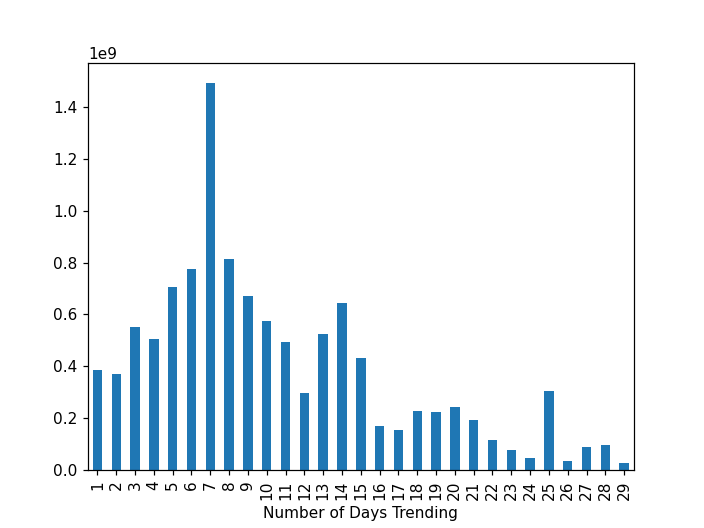

In [16]:
#Create a Bar Graph of how many days it was trending vs. views

#Format Views

#ytMaster_df["Total Views"] = ytMaster_df["Total Views"].map("{:,}")

#ytMaster_df.plot(kind='bar',x='Number of Days Trending',y='Total Views')
#This didn't work so had to change it to groupby



ytMaster_df.groupby('Number of Days Trending')['Total Views'].sum().plot(kind='bar')


In [17]:
#Same thing but show average views for number of days trending
ytMaster_df.groupby("Number of Days Trending")["Total Views"].mean().plot(kind="bar")

plt.show()

What can I infer from this information? 
